**Car_Price_Prediction
 **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/CarPrice_Assignment.csv")

In [ ]:
data.shape

(205, 26)

In [ ]:
data.info

<bound method DataFrame.info of      car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19     

In [ ]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# Check Missing Values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype']=labelencoder.fit_transform(data['fueltype'])
data['aspiration']=labelencoder.fit_transform(data['aspiration'])
data['carbody']=labelencoder.fit_transform(data['carbody'])
data['drivewheel']=labelencoder.fit_transform(data['drivewheel'])
data['enginelocation']=labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem']=labelencoder.fit_transform(data['fuelsystem'])
data['doornumber']=labelencoder.fit_transform(data['doornumber'])


In [ ]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,1,0,1,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,1,0,0,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,1,0,0,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,1,0,1,3,1,0,99.8,177.3,66.3,53.1,2507,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,1,0,0,3,1,0,105.8,192.7,71.4,55.7,2844,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,1,0,0,4,1,0,105.8,192.7,71.4,55.7,2954,ohc,five,136,5,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,1,1,0,3,1,0,105.8,192.7,71.4,55.9,3086,ohc,five,131,5,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),1,1,1,2,0,0,99.5,178.2,67.9,52.0,3053,ohc,five,131,5,3.13,3.40,7.0,160,5500,16,22,17859.167


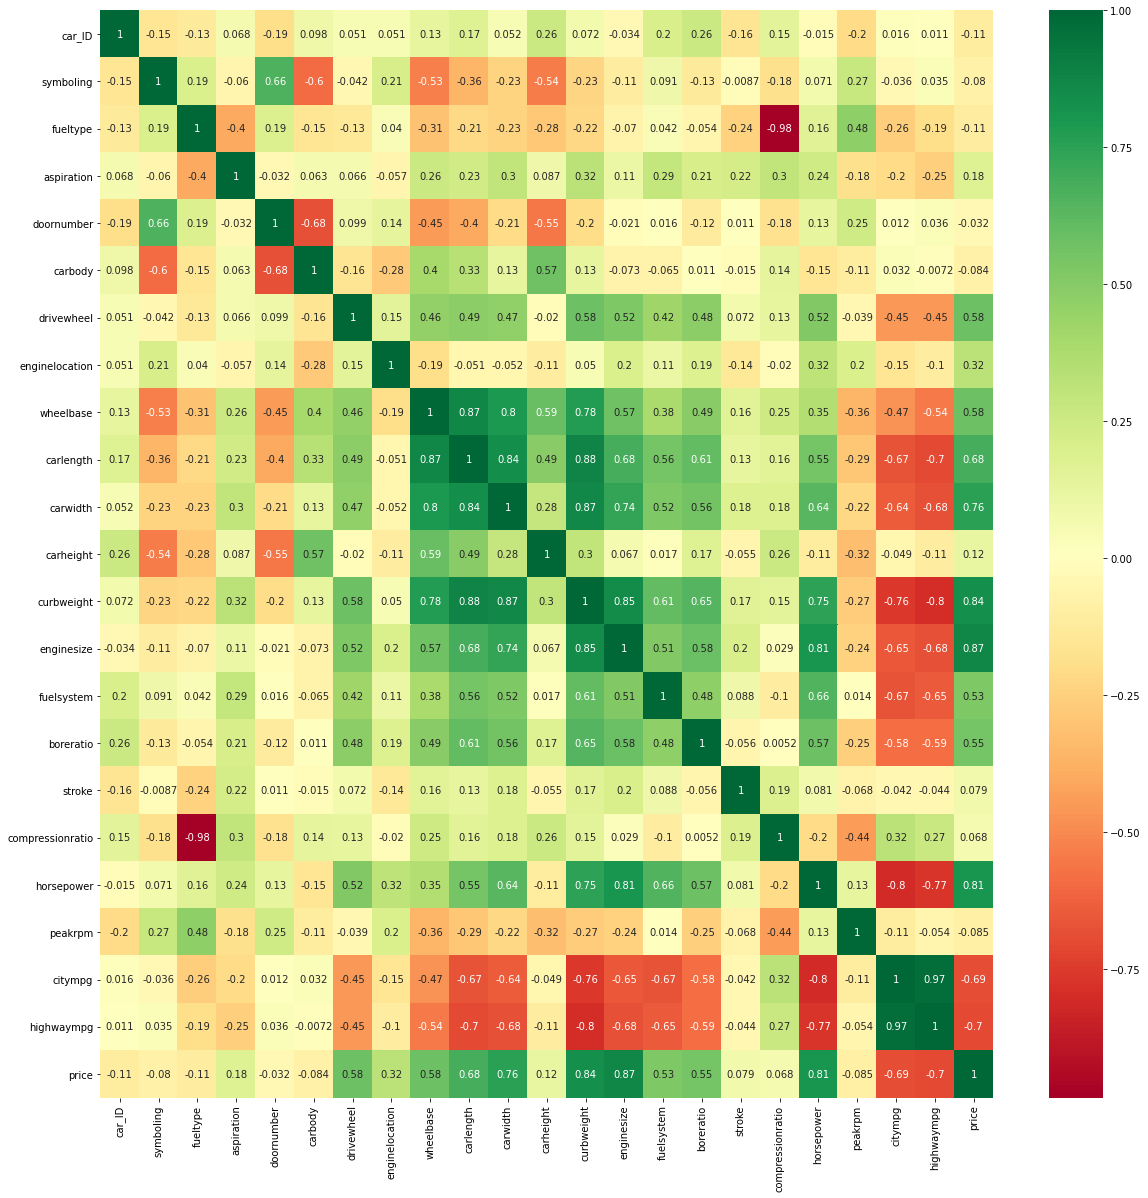

In [ ]:
correlation=data.corr()
top_corr_features=correlation.index
plt.figure(figsize=(20,20))
a=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [ ]:
data1=data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
            'wheelbase','drivewheel','price','enginelocation']]
data1.head(4)

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   horsepower      205 non-null    int64  
 1   boreratio       205 non-null    float64
 2   enginesize      205 non-null    int64  
 3   curbweight      205 non-null    int64  
 4   carwidth        205 non-null    float64
 5   carlength       205 non-null    float64
 6   wheelbase       205 non-null    float64
 7   drivewheel      205 non-null    int64  
 8   price           205 non-null    float64
 9   enginelocation  205 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 16.1 KB


In [ ]:
data1.describe()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,104.117073,3.329756,126.907317,2555.565854,65.907805,174.049268,98.756585,1.326829,13276.710571,0.014634
std,39.544167,0.270844,41.642693,520.680204,2.145204,12.337289,6.021776,0.556171,7988.852332,0.120377
min,48.000000,2.540000,61.000000,1488.000000,60.300000,141.100000,86.600000,0.000000,5118.000000,0.000000
25%,70.000000,3.150000,97.000000,2145.000000,64.100000,166.300000,94.500000,1.000000,7788.000000,0.000000
50%,95.000000,3.310000,120.000000,2414.000000,65.500000,173.200000,97.000000,1.000000,10295.000000,0.000000
75%,116.000000,3.580000,141.000000,2935.000000,66.900000,183.100000,102.400000,2.000000,16503.000000,0.000000
max,288.000000,3.940000,326.000000,4066.000000,72.300000,208.100000,120.900000,2.000000,45400.000000,1.000000


In [ ]:
# Normalizing the data
mean = data1.mean(axis=0)
data1 -= mean

std = data1.std(axis=0)
data1 /= std


In [ ]:
data1

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,0.174057,0.517804,0.074267,-0.014531,-0.842719,-0.425480,-1.686643,1.210367,0.027324,-0.121569
1,0.174057,0.517804,0.074267,-0.014531,-0.842719,-0.425480,-1.686643,1.210367,0.403473,-0.121569
2,1.261448,-2.399008,0.602571,0.513625,-0.190101,-0.230948,-0.706865,1.210367,0.403473,-0.121569
3,-0.053537,-0.516003,-0.430023,-0.419770,0.136209,0.206750,0.173274,-0.587642,0.084279,-0.121569
4,0.275209,-0.516003,0.218350,0.515545,0.229440,0.206750,0.106848,-2.385652,0.522389,-0.121569
...,...,...,...,...,...,...,...,...,...,...
200,0.249921,1.662375,0.338419,0.761377,1.394830,1.195622,1.717669,1.210367,0.446659,-0.121569
201,1.413178,1.662375,0.338419,0.947672,1.348215,1.195622,1.717669,1.210367,0.722042,-0.121569
202,0.755685,0.923942,1.106861,0.876611,1.394830,1.195622,1.717669,1.210367,1.027468,-0.121569
203,0.047616,-1.180593,0.434474,1.270327,1.394830,1.195622,1.717669,1.210367,1.150765,-0.121569


In [ ]:
data1.describe()

,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000,2.050000e+02,2.050000e+02
mean,1.775003e-16,-5.910719e-15,4.034713e-17,1.261863e-16,1.431700e-14,-1.011440e-14,-2.017898e-14,0.000000,1.353931e-16,-1.371532e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00
min,-1.419099e+00,-2.915911e+00,-1.582686e+00,-2.050329e+00,-2.614113e+00,-2.670706e+00,-2.018771e+00,-2.385652,-1.021262e+00,-1.215691e-01
25%,-8.627587e-01,-6.636894e-01,-7.181888e-01,-7.885183e-01,-8.427194e-01,-6.281176e-01,-7.068655e-01,-0.587642,-6.870462e-01,-1.215691e-01
50%,-2.305542e-01,-7.294280e-02,-1.658710e-01,-2.718864e-01,-1.901008e-01,-6.883752e-02,-2.917055e-01,-0.587642,-3.732339e-01,-1.215691e-01
75%,3.004976e-01,9.239421e-01,3.384191e-01,7.287278e-01,4.625179e-01,7.336078e-01,6.050399e-01,1.210367,4.038489e-01,-1.215691e-01
max,4.650065e+00,2.253122e+00,4.780975e+00,2.900886e+00,2.979761e+00,2.759985e+00,3.677223e+00,1.210367,4.021014e+00,8.185651e+00


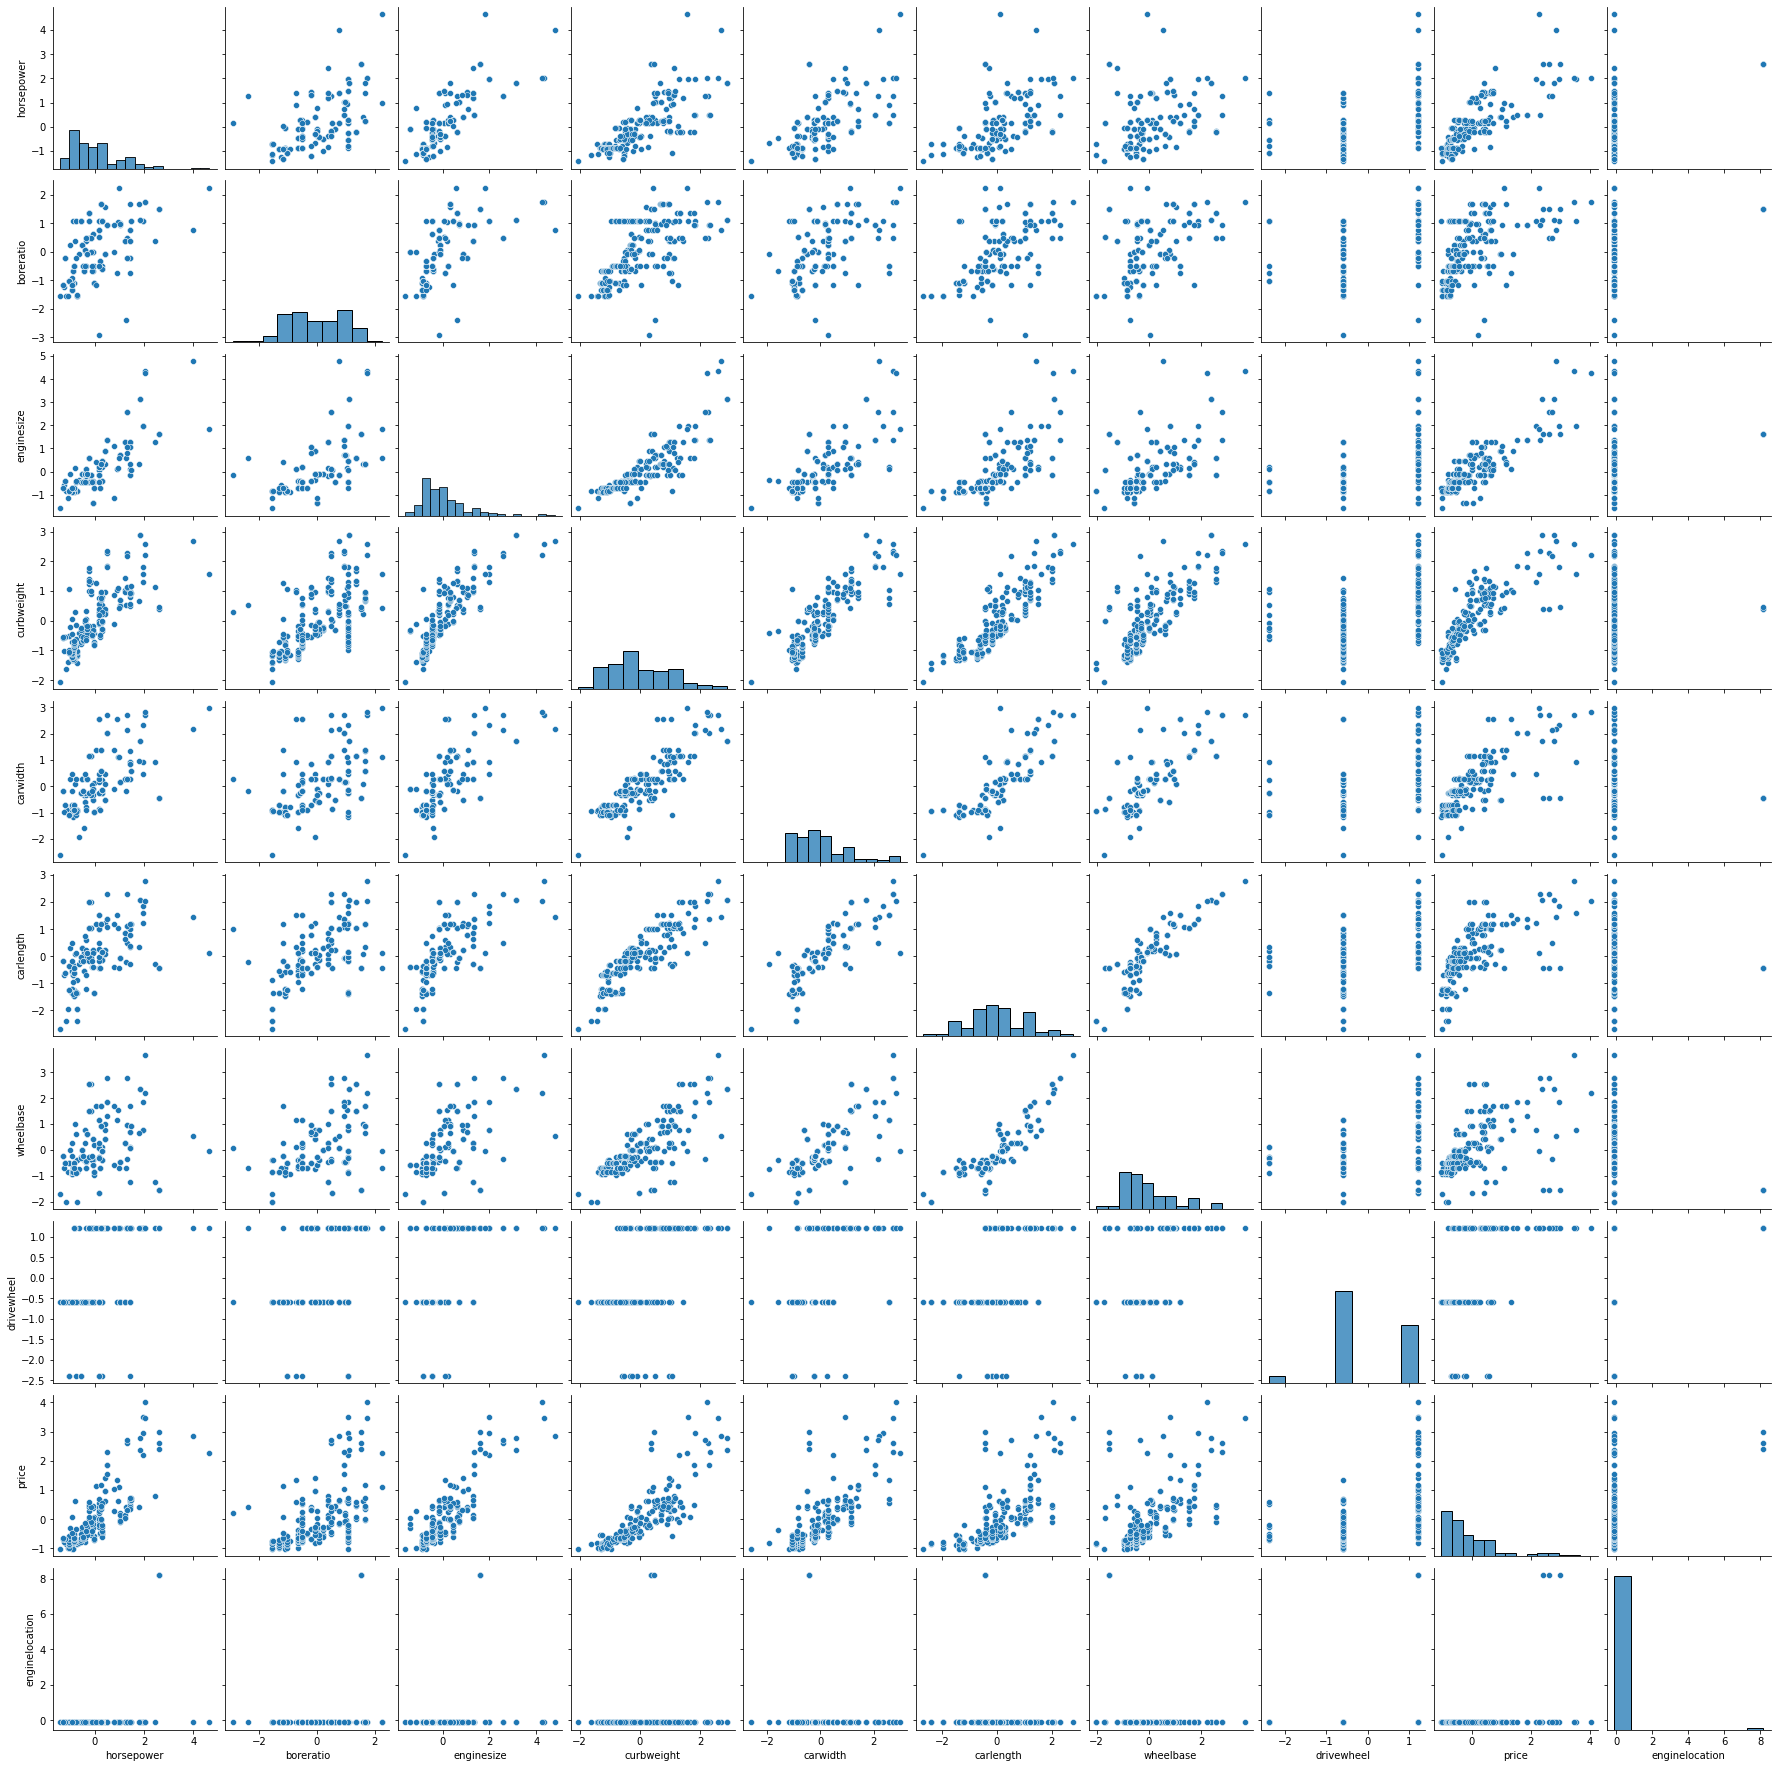

In [ ]:
b=sns.pairplot(data1)
b

In [ ]:
# Split Data
X=(data1[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
            'wheelbase','drivewheel','enginelocation']])
Y=(data1[['price']])
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.30,random_state=54)

In [ ]:
def build_model():
      model = Sequential()
      model.add(tf.keras.layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
      model.add(tf.keras.layers.Dense(8, activation='relu'))
      model.add(tf.keras.layers.Dense(6, activation='relu'))
      model.add(tf.keras.layers.Dense(1))
      model.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
      return model

In [ ]:
# Validation
k=5
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []

all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    X_val =X_train[i * num_val_samples: (i + 1) * num_val_samples]
    Y_val = Y_train[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_X_train = np.concatenate(
        [X_train[:i * num_val_samples],
         X_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_Y_train = np.concatenate(
        [Y_train[:i * num_val_samples],
         Y_train[(i + 1) * num_val_samples:]],
        axis=0)
    
    
model = build_model()
history = model.fit(partial_X_train, partial_Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=num_epochs, batch_size=1, verbose=0)
mae_history = history.history['val_mae']
all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4


In [ ]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

 Building the history of successive mean K-fold validation scores

In [ ]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [ ]:
average_mae_history

[0.492069274187088,
 0.40903860330581665,
 0.38671669363975525,
 0.3885233998298645,
 0.37353232502937317,
 0.36913377046585083,
 0.36097922921180725,
 0.3626368045806885,
 0.35694047808647156,
 0.3516916334629059,
 0.35553497076034546,
 0.34999918937683105,
 0.358384907245636,
 0.3465287387371063,
 0.35327789187431335,
 0.34596091508865356,
 0.3484672009944916,
 0.35625165700912476,
 0.36818137764930725,
 0.3473989963531494,
 0.35149314999580383,
 0.35386183857917786,
 0.3507801592350006,
 0.35515525937080383,
 0.35783490538597107,
 0.35395917296409607,
 0.35927799344062805,
 0.38022127747535706,
 0.3735531270503998,
 0.3589613735675812,
 0.360455185174942,
 0.3861519992351532,
 0.3623199164867401,
 0.35079798102378845,
 0.3515923023223877,
 0.36118558049201965,
 0.3627259135246277,
 0.37018734216690063,
 0.38184645771980286,
 0.3694566786289215,
 0.36733606457710266,
 0.3755433261394501,
 0.36951175332069397,
 0.37576696276664734,
 0.3575933575630188,
 0.35044384002685547,
 0.3747238

 Plotting validation scores

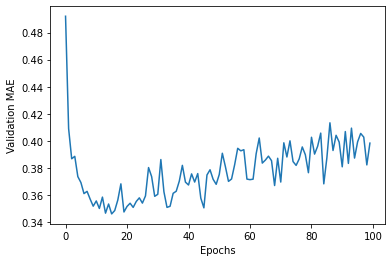

In [ ]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

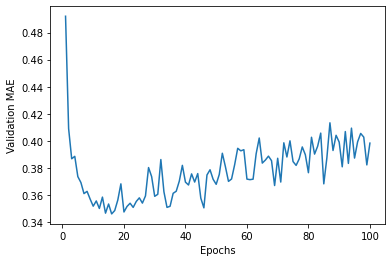

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

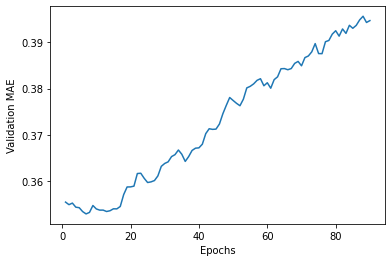

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Training the final model

In [ ]:
model = build_model()
model.fit(X_train, Y_train,
          epochs=100, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.0819 - mae: 0.2107


In [ ]:
test_mse_score

0.08190027624368668

In [ ]:
test_mae_score

0.21068590879440308

In [ ]:
#Prediction
Prediction=model.predict(X_test)
Prediction


array([[ 0.88610536],
       [-0.59949315],
       [-0.6424241 ],
       [ 0.80477977],
       [-0.26340604],
       [ 3.3454363 ],
       [-0.30224764],
       [-0.5705166 ],
       [-0.5667879 ],
       [-0.63404965],
       [-0.82343215],
       [-0.51173735],
       [-0.0813076 ],
       [ 0.05752354],
       [-0.75108045],
       [ 0.29732698],
       [ 3.796838  ],
       [-0.47011396],
       [-0.48409358],
       [ 0.6910686 ],
       [ 0.05253636],
       [ 0.11969317],
       [-0.05057839],
       [-0.47092313],
       [-0.47092313],
       [ 0.45565888],
       [-0.5407174 ],
       [ 0.24800159],
       [ 0.36578572],
       [-0.6543467 ],
       [-0.30224767],
       [-0.6432895 ],
       [ 0.11565951],
       [-0.37676334],
       [ 0.7547892 ],
       [ 0.41368648],
       [ 2.6450508 ],
       [-0.80546135],
       [-0.67770773],
       [-0.6865559 ],
       [-0.51715773],
       [-0.01812681],
       [ 0.36124864],
       [ 0.24800159],
       [ 0.7703102 ],
       [-0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


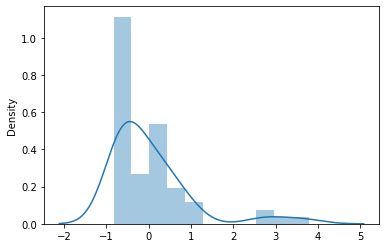

In [ ]:
sns.distplot(Prediction,kde=True)